In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse ,r2_score , mean_absolute_error as mae

In [3]:
df=pd.read_csv("car data (3) (1).csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
  df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df['age']=2026-df['Year']

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,12
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,13
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,9
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,15
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,12


In [9]:
df.drop(columns=['Year'], inplace =True)

In [14]:
data=df.select_dtypes(np.number)


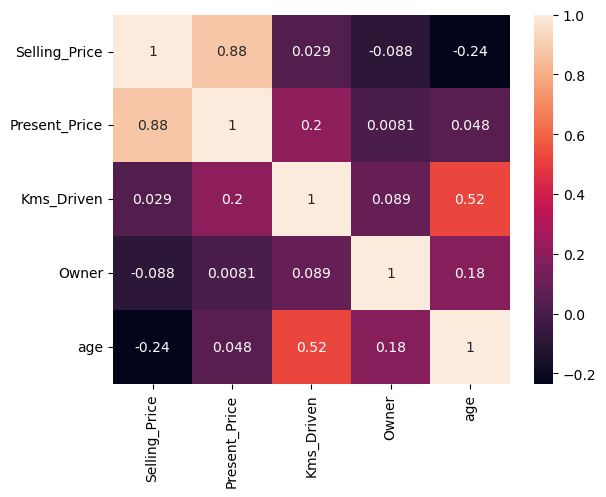

In [15]:
sns.heatmap(data.corr(),annot=True);

In [16]:
df1=pd.get_dummies(df,columns=['Fuel_Type','Seller_Type', 'Transmission'],drop_first=True)
df1

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,12,False,True,False,True
1,sx4,4.75,9.54,43000,0,13,True,False,False,True
2,ciaz,7.25,9.85,6900,0,9,False,True,False,True
3,wagon r,2.85,4.15,5200,0,15,False,True,False,True
4,swift,4.60,6.87,42450,0,12,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,0,10,True,False,False,True
297,brio,4.00,5.90,60000,0,11,False,True,False,True
298,city,3.35,11.00,87934,0,17,False,True,False,True
299,city,11.50,12.50,9000,0,9,True,False,False,True


In [17]:
df2=df1.groupby(['Car_Name'])['Selling_Price'].mean().reset_index().rename(columns={'Selling_Price':'Car'})
df2

,Car_Name,Car
0,800,0.350000
1,Activa 3g,0.310000
2,Activa 4g,0.400000
3,Bajaj ct 100,0.180000
4,Bajaj Avenger 150,0.750000
...,...,...
93,sx4,3.158333
94,verna,6.107857
95,vitara brezza,9.250000
96,wagon r,2.512500


In [18]:
df3=pd.merge(df1,df2,how='inner',on='Car_Name')
df3

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Car
0,ritz,3.35,5.59,27000,0,12,False,True,False,True,2.862500
1,sx4,4.75,9.54,43000,0,13,True,False,False,True,3.158333
2,ciaz,7.25,9.85,6900,0,9,False,True,False,True,7.472222
3,wagon r,2.85,4.15,5200,0,15,False,True,False,True,2.512500
4,swift,4.60,6.87,42450,0,12,True,False,False,True,4.540000
...,...,...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,0,10,True,False,False,True,7.419231
297,brio,4.00,5.90,60000,0,11,False,True,False,True,4.745000
298,city,3.35,11.00,87934,0,17,False,True,False,True,7.419231
299,city,11.50,12.50,9000,0,9,True,False,False,True,7.419231


In [19]:
df3.drop(columns=['Car_Name'],inplace=True)

<Axes: >

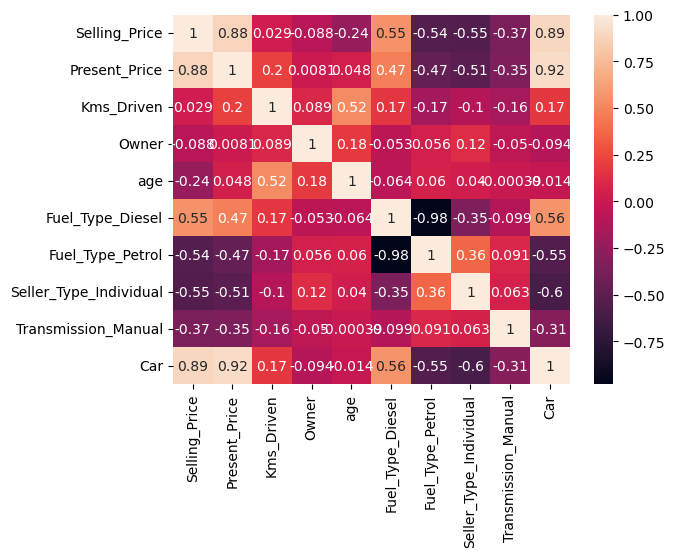

In [20]:
sns.heatmap(df3.corr(),annot=True)

In [21]:
x=df3.drop(columns=['Selling_Price'])
y=df3['Selling_Price']

In [22]:
st=StandardScaler()

In [23]:
x_scaled=st.fit_transform(x)
x_scaled

array([[-0.23621461, -0.25622446, -0.17450057, ..., -0.73728539,
         0.39148015, -0.39671534],
       [ 0.22150462,  0.1559105 , -0.17450057, ..., -0.73728539,
         0.39148015, -0.33147079],
       [ 0.25742689, -0.77396901, -0.17450057, ..., -0.73728539,
         0.39148015,  0.61993571],
       ...,
       [ 0.39068691,  1.31334003, -0.17450057, ..., -0.73728539,
         0.39148015,  0.60824871],
       [ 0.56450434, -0.7198763 , -0.17450057, ..., -0.73728539,
         0.39148015,  0.60824871],
       [-0.20029235, -0.81095812, -0.17450057, ..., -0.73728539,
         0.39148015,  0.01846057]], shape=(301, 9))

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=2)

In [25]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(240, 9) (240,)
(61, 9) (61,)


In [26]:
lr=LinearRegression()

In [27]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [29]:
r2_score(y_train,y_pred_train)

0.8981981965509465

In [30]:
r2_score(y_test,y_pred_test)

0.8784230010478591